# 2-layer FNN on Cifar

This is MLP (784-X^W-10) on MNIST. SGD algorithm (lr=0.1) with 100 epoches.

 

In [2]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import itertools


%matplotlib inline

In [3]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

""" Extract number of total parameters for each net config from resman's diary file"""
def parse_num_params(line0):
    line_str = ''.join(lines0)
    idx = line_str.find("Total params")
    param_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(locale.atof(param_num))

#### Extract results from diary file

    1. Number of params
    2. Loss/Accuarcy for training/testing
    3. Runing time

In [40]:
l2_value = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0] # [100,1,0.01,0]
results_dir = '../results/fnn_cifar_l2_reg' # fnn_mnist_l2_dir, fnn_cifar_l2_0
       
depth = [2]
width = [200]
dim   = [0,250,500,750,1000,1250,1500,1750,1900,1950,2000,2050,2100,2250,2500,3000,4000,5000,5250,5500,5750,6000,6250,6500,6750,7000,7250,7500,7750,8000,8250,8500,8750,9000,9250,9500,9750,10000,15000,20000,25000,30000,35000,40000,45000,50000,100000,200000]

########## 1. filename list of diary ########################
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)
            
print diary_names
            
########## 2. Construct stats (width, depth, dim) ##########
# acc_test_all : Tensor (width, depth, dim)
# num_param_all: Tensor (width, depth)
############################################################
nw, nd, nn, nl= len(width), len(depth), len(dim), len(l2_value)

acc_test_all  = np.zeros((len(width), len(depth), len(l2_value)))
num_param_all = np.zeros((len(width), len(depth)))

mode = 1        # {0: test loss, 1: test acc}
error_files = [] #  record the error file
dim = []

# 2.1 construct acc_test_all and num_param_all
for i in range(len(l2_value)):
    d = l2_value[i]

    # 2.1.1 Read the results, 
    for f in diary_names:
        if '_'+str(d)+'/' in f:
            # print "%d is in" % d + f

            str_tmp = f.split('_')
            str_tmp[-1]

            with open(f,'r') as ff:
                lines0 = ff.readlines()
                try:
                    R = extract_num(lines0)
                    R = np.array(R)

                except ValueError:
                    error_files.append((w,ll,d))
                    R = np.zeros(len(R))
                    print "Error. Can not read config: depth %d, width %d and dim %d." % (ll, w, d) 
                    # break


    # 2.1.2 Assign the results
    r = R[mode]  
    acc_test_all[0,0,i]=r

########## 3. Construct Tensors for Analysis (width, depth, dim) ##########                    
acc_base  = acc_test_all[:,:,0]

                                       

['../results/fnn_mnist_l2_dir/171003_210513_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_10/diary', '../results/fnn_mnist_l2_dir/171003_210328_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_0.001/diary', '../results/fnn_mnist_l2_dir/171003_210513_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_0.01/diary', '../results/fnn_mnist_l2_dir/171003_210342_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_10000/diary', '../results/fnn_mnist_l2_dir/171003_210532_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_100/diary', '../results/fnn_mnist_l2_dir/171003_210328_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_0.1/diary', '../results/fnn_mnist_l2_dir/171003_210328_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_0/diary', '../results/fnn_mnist_l2_dir/171003_210328_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_1/diary', '../results/fnn_mnist_l2_dir/171003_210520_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_0.0001/diary', '../results/fnn_mnist_l2_dir/171003_210335_9e4037a_lrb_fnn_mnist_sparse_dir_0_2_200_1000/diary']


In [41]:
print "Baseline results"
print acc_test_all[0,0,:] 

Baseline results
[ 0.9839  0.9836  0.9829  0.9831  0.9835  0.9829  0.9843  0.9839  0.9848
  0.9836]


-------------------------

### Testing Accuracy wrt. Width, Depth and Dim

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns

plt.figure(figsize=(20,5.0))

for i in range(acc_test_all.shape[2]):
    acc = acc_test_all[:,:,i].reshape(len(depth)*len(width),order='F')
    if i==0:
        plt.scatter(fig_params_1d, acc, s=(np.array(fig_width)**1.8)/100, c=fig_depth, edgecolors='k') 
        plt.scatter(fig_params_1d, sr*acc, marker="_", s=300, c='k', edgecolors='r') 
    else:
        plt.scatter(fig_params_1d, acc, s=(np.array(fig_width)**1.8)/100, c=fig_depth, facecolors='None', linewidth=np.array(dim[i])/300.0) 

        
ax = plt.gca()
plt.colorbar(label="Depth")

ax.set_xscale('log')
ax.grid(True)

ax.set_ylim(0.1, 1.0)
ax.set_xlim(0.3E5, 1.5E6)

plt.xlabel('# parameters')
plt.ylabel('# accuracy')

#make a legend:
pws = width
for pw in pws:
    plt.scatter([], [], s=(pw**1.8)/1000, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[0:], l[0:], labelspacing=1.2, title="layer width", borderpad=1, loc='best', bbox_to_anchor=(1.25, 1),
             frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")

 
    

#### Intrinsic dim for #parameters

In [25]:
plt.figure(figsize=(20,5))

plt.scatter(fig_params_1d, dim_solved_all_1d, s=(np.array(fig_width)**2.0)/100, c=fig_depth, edgecolors='k') 

ax = plt.gca()
plt.colorbar(label="Depth")

ax.set_xscale('log')

ax.grid(True)
ax.set_ylim(0, 700)

plt.xlabel('# parameters')
plt.ylabel('# dimension')
ax.set_xlim(0.3E5, 1.5E6)

#make a legend:
pws = width
for pw in pws:
    plt.scatter([], [], s=(pw**1.8)/100, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[0:], l[0:], labelspacing=1.2, title="layer width", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")

NameError: name 'fig_params_1d' is not defined

## Performance comparison with Baseline

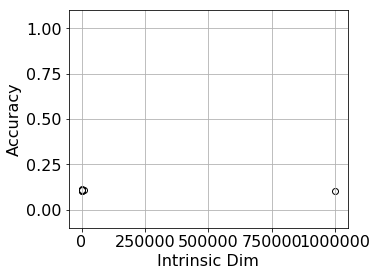

In [36]:
fig = plt.figure(figsize=(5,4))
fig.subplots_adjust(hspace=0.3)
fig, ax = subplots(figsize=(5,4) )

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

for i in range(nw):
    for j in range(nd):
        id = i*nd+j+1
        ax = plt.subplot(nw, nd, id)

        plt.scatter(l2_value, acc_test_all[i,j,:], edgecolor="k", facecolor="w" )
        ax.set_xlabel('Intrinsic Dim')
        ax.set_ylabel('Accuracy')
        # ax.set_title('width %d, depth %d' %(width[i], depth[j]))
        plt.grid()
        ax.set_ylim([-0.1,1.1])
        # ax.set_xscale('log')
        
#fig.savefig("fnn_cifar.pdf", bbox_inches='tight')        
